# Logistic Regression Method

In [31]:
# import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, roc_curve

In [43]:
###load data first
#E1 data
#features = np.loadtxt("features_all.txt", delimiter=",")
#labels = np.loadtxt("labels_all.txt", delimiter=",")
#E2data
features = np.loadtxt("features_all_2.txt", delimiter=",")
labels = np.loadtxt("labels_all_2.txt", delimiter=",")
X = features
Y = labels
Y = np.array([labels, -(labels-1)]).T 
# normalize
X = (X - X.min(0)) / X.ptp(0)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 1234)

print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

x_train shape: (24716, 244)
y_train shape: (24716, 2)
x_test shape: (8239, 244)
y_test shape: (8239, 2)


Epoch: 0020 cost= 0.331572757
Epoch: 0040 cost= 0.256464979
Epoch: 0060 cost= 0.215017776
Epoch: 0080 cost= 0.187962453
Epoch: 0100 cost= 0.168594139
Epoch: 0120 cost= 0.153896536
Epoch: 0140 cost= 0.142283494
Epoch: 0160 cost= 0.132829520
Epoch: 0180 cost= 0.124953554
Epoch: 0200 cost= 0.118270234
Epoch: 0220 cost= 0.112512774
Epoch: 0240 cost= 0.107489925
Epoch: 0260 cost= 0.103060976
Epoch: 0280 cost= 0.099119534
Epoch: 0300 cost= 0.095583886
Epoch: 0320 cost= 0.092389900
Epoch: 0340 cost= 0.089486662
Epoch: 0360 cost= 0.086833115
Epoch: 0380 cost= 0.084395780
Epoch: 0400 cost= 0.082146965
Epoch: 0420 cost= 0.080063768
Epoch: 0440 cost= 0.078126917
Epoch: 0460 cost= 0.076320138
Epoch: 0480 cost= 0.074629399
Epoch: 0500 cost= 0.073042884
Optimization Finished!
Training Accuracy: 0.9871743
Testing Accuracy: 0.987984
Confusion Matrix is:  [[2028   39]
 [  60 6112]]


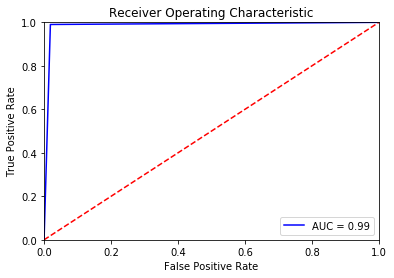

In [46]:
# Parameters
learning_rate = 0.01
training_epochs = 500
batch_size = 100
display_step = 20

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 244]) # 244 features 
y = tf.placeholder(tf.float32, [None, 2]) # 2 classes

# Set model weights
W = tf.Variable(tf.zeros([244, 2]))
b = tf.Variable(tf.zeros([2]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
beta = 0
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# cost function using L2 Regularization
regularizer = tf.nn.l2_loss(W)
cost = tf.reduce_mean(cost + beta * regularizer)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(x_train)/batch_size)
        X_batches = np.array_split(x_train, total_batch)
        Y_batches = np.array_split(y_train, total_batch)
        # Loop over all batches
        for i in range(total_batch):

            #batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            batch_xs, batch_ys = X_batches[i], Y_batches[i]
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Training Accuracy:", accuracy.eval({x: x_train, y: y_train}))
    print("Testing Accuracy:", accuracy.eval({x: x_test, y: y_test}))
    global result 
    result = tf.argmax(pred, 1).eval({x: x_test, y: y_test})
    result = np.array(result)
    #confusion matrix
    con_mat = confusion_matrix(y_test[:,1], result)
    print("Confusion Matrix is: ", con_mat)
    
    #ROC curve
    fpr, tpr, threshold = roc_curve(y_test[:,1], result)
    roc_auc = auc(fpr, tpr)

    # method I: plt

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()